In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
keep_cols_all = ["CANONICAL_SMILES", "INCHIKEY", "active", "dataset", "data_type", "common_name", "action_type"]


# Combining data

We are going to combine data from the ChEMBL and Veith datasets to try and come up with a set of compounds to test

# NCATS
Assay data from NCATS for AID 410


In [2]:
ncats = pd.read_csv("processed/ncats_adme_aid410.csv")

In [3]:
ncats.head()

,CANONICAL_SMILES,INCHIKEY,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_CID,dataset,data_type,common_name,action_type
0,COc1ccccc1-c1ccc2ncnc(N3CCOCC3)c2c1,JCTMVLMTEATXTB-UHFFFAOYSA-N,Active,3233812.0,ncats_adme_aid410,assay,NaN,inhibitor
1,Cc1ccccc1-c1ccc2ncnc(N3CCOCC3)c2c1,WNHINCBEZIFTDR-UHFFFAOYSA-N,Active,3234793.0,ncats_adme_aid410,assay,NaN,inhibitor
2,COc1ccccc1-c1cc(Nc2cc[nH]n2)ncn1,AYLDUSFSYKQSKR-UHFFFAOYSA-N,Active,3235003.0,ncats_adme_aid410,assay,NaN,inhibitor
3,Fc1ccc(Nc2ncnc3ccc(-c4ccoc4)cc23)cc1,HCVDOQOETCJCDC-UHFFFAOYSA-N,Active,3234899.0,ncats_adme_aid410,assay,NaN,inhibitor
4,Cc1cccc(CNc2ccnc(-c3cccnc3)n2)c1,CUCAHHHOAQSGHY-UHFFFAOYSA-N,Active,3233467.0,ncats_adme_aid410,assay,NaN,inhibitor


<Axes: xlabel='PUBCHEM_ACTIVITY_OUTCOME', ylabel='count'>

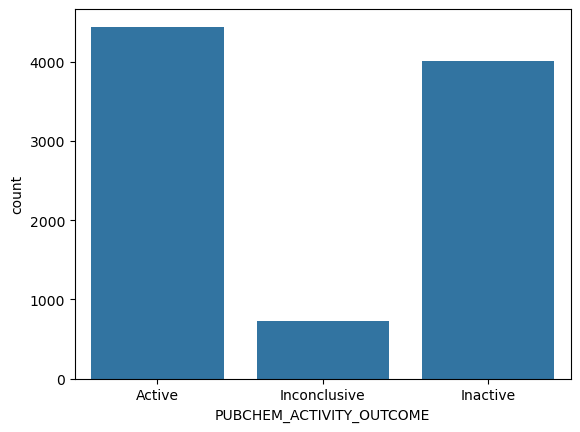

In [4]:
sns.countplot(data=ncats, x="PUBCHEM_ACTIVITY_OUTCOME")

In [5]:
ncats_actives = ncats.query("PUBCHEM_ACTIVITY_OUTCOME == 'Active'")
ncats_actives["active"] = True

/tmp/ipykernel_32412/667201052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncats_actives["active"] = True


In [6]:
ncats_actives.head()

,CANONICAL_SMILES,INCHIKEY,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_CID,dataset,data_type,common_name,action_type,active
0,COc1ccccc1-c1ccc2ncnc(N3CCOCC3)c2c1,JCTMVLMTEATXTB-UHFFFAOYSA-N,Active,3233812.0,ncats_adme_aid410,assay,NaN,inhibitor,True
1,Cc1ccccc1-c1ccc2ncnc(N3CCOCC3)c2c1,WNHINCBEZIFTDR-UHFFFAOYSA-N,Active,3234793.0,ncats_adme_aid410,assay,NaN,inhibitor,True
2,COc1ccccc1-c1cc(Nc2cc[nH]n2)ncn1,AYLDUSFSYKQSKR-UHFFFAOYSA-N,Active,3235003.0,ncats_adme_aid410,assay,NaN,inhibitor,True
3,Fc1ccc(Nc2ncnc3ccc(-c4ccoc4)cc23)cc1,HCVDOQOETCJCDC-UHFFFAOYSA-N,Active,3234899.0,ncats_adme_aid410,assay,NaN,inhibitor,True
4,Cc1cccc(CNc2ccnc(-c3cccnc3)n2)c1,CUCAHHHOAQSGHY-UHFFFAOYSA-N,Active,3233467.0,ncats_adme_aid410,assay,NaN,inhibitor,True


In [7]:
ncats_actives = ncats_actives[keep_cols_all]
ncats_actives

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type
0,COc1ccccc1-c1ccc2ncnc(N3CCOCC3)c2c1,JCTMVLMTEATXTB-UHFFFAOYSA-N,True,ncats_adme_aid410,assay,NaN,inhibitor
1,Cc1ccccc1-c1ccc2ncnc(N3CCOCC3)c2c1,WNHINCBEZIFTDR-UHFFFAOYSA-N,True,ncats_adme_aid410,assay,NaN,inhibitor
2,COc1ccccc1-c1cc(Nc2cc[nH]n2)ncn1,AYLDUSFSYKQSKR-UHFFFAOYSA-N,True,ncats_adme_aid410,assay,NaN,inhibitor
3,Fc1ccc(Nc2ncnc3ccc(-c4ccoc4)cc23)cc1,HCVDOQOETCJCDC-UHFFFAOYSA-N,True,ncats_adme_aid410,assay,NaN,inhibitor
4,Cc1cccc(CNc2ccnc(-c3cccnc3)n2)c1,CUCAHHHOAQSGHY-UHFFFAOYSA-N,True,ncats_adme_aid410,assay,NaN,inhibitor
...,...,...,...,...,...,...,...
7051,CCCCOc1ccc(CC(O)=NO)cc1,MXJWRABVEGLYDG-UHFFFAOYSA-N,True,ncats_adme_aid410,assay,NaN,inhibitor
7052,CCCCc1ccc2[nH]c(NC(=O)OC)nc2c1,YRWLZFXJFBZBEY-UHFFFAOYSA-N,True,ncats_adme_aid410,assay,NaN,inhibitor
7053,CC(C(=O)O)c1ccc(C(=O)c2ccccc2)s1,GUHPRPJDBZHYCJ-UHFFFAOYSA-N,True,ncats_adme_aid410,assay,NaN,inhibitor
7054,CO[C@@]12C[C@@H](COC(=O)c3cncc(Br)c3)CN(C)[C@H...,YSEXMKHXIOCEJA-OECQAKIHSA-N,True,ncats_adme_aid410,assay,NaN,inhibitor


# Veith

Assay data from veith et al


In [8]:
veith = pd.read_csv("processed/veith_2009.csv")
veith.head()

,PubChemCID,SMILES,Active,CANONICAL_SMILES,INCHIKEY,dataset,data_type,common_name,action_type
0,6602638.0,CCCC(=O)Nc1ccc(N2CCN(CC)CC2)c(Cl)c1.Cl,0,CCCC(=O)Nc1ccc(N2CCN(CC)CC2)c(Cl)c1,ULLDFBZUOXJYID-UHFFFAOYSA-N,veith_2009,assay,NaN,inhibitor
1,644510.0,O=c1[nH]c2cc3c(cc2cc1CN(CCCO)Cc1nnnn1Cc1ccc(F)...,1,O=c1[nH]c2cc3c(cc2cc1CN(CCCO)Cc1nnnn1Cc1ccc(F)...,VTLXYSNKFGEFDQ-UHFFFAOYSA-N,veith_2009,assay,NaN,inhibitor
2,1960010.0,CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21,1,CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21,JNCIAHUGNMSHOQ-YPKPFQOOSA-N,veith_2009,assay,NaN,inhibitor
3,644675.0,CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1,1,CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1,GEUQHFHLRHDTPU-UHFFFAOYSA-N,veith_2009,assay,NaN,inhibitor
4,644851.0,Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1,1,Clc1ccccc1-c1n[nH]c(-c2ccccc2)n1,AHWJVKKSEVAPMR-UHFFFAOYSA-N,veith_2009,assay,NaN,inhibitor


<Axes: xlabel='Active', ylabel='count'>

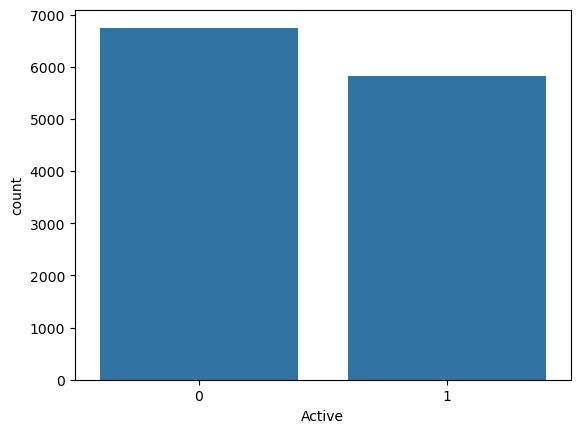

In [9]:
sns.countplot(data=veith, x="Active")

In [10]:
veith_actives = veith.query("Active == 1")
veith_actives["active"] = True
veith_actives = veith_actives[keep_cols_all]

/tmp/ipykernel_32412/1919675608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veith_actives["active"] = True


In [11]:
veith_actives

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type
1,O=c1[nH]c2cc3c(cc2cc1CN(CCCO)Cc1nnnn1Cc1ccc(F)...,VTLXYSNKFGEFDQ-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
2,CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21,JNCIAHUGNMSHOQ-YPKPFQOOSA-N,True,veith_2009,assay,NaN,inhibitor
3,CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1,GEUQHFHLRHDTPU-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
4,Clc1ccccc1-c1n[nH]c(-c2ccccc2)n1,AHWJVKKSEVAPMR-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
5,COc1ccccc1CNC(=O)Cn1nnc(-c2ccncc2)n1,OJEJKWUQFREXKZ-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
...,...,...,...,...,...,...,...
11950,Cc1cc(OCc2ccc([N+](=O)[O-])cc2)c2c3c(c(=O)oc2c...,ZFOUCGXCHMOGAD-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
11952,COc1cc(CNC2CCCC2)cc(Cl)c1OCc1ccccc1Cl,PKSMIXVRARBJHK-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
11956,O=C(CSc1nnc(SCc2cccc3ccccc23)s1)c1ccc2c(c1)OCO2,WOJKMKPLQQABSF-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
11961,Cc1ccnc(NC(=S)NC(=O)c2ccco2)c1,WBCVNVHMWHVHQN-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor


# Tox 21
This is from AID 1671199

In [12]:
tox = pd.read_csv("processed/tox21_adme_aid1671199.csv")

In [13]:
tox.head()

,CANONICAL_SMILES,INCHIKEY,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_CID,dataset,data_type,common_name,action_type
0,CN1C(=S)CN=C(c2ccccc2)c2cc(Cl)ccc21,MWGWTOPCKLQYEU-UHFFFAOYSA-N,Inconclusive,17931.0,tox_adme_aid1671199,assay,NaN,inhibitor
1,COC(=O)C1[C@H]2C[C@@H]3c4[nH]c5cc(OC)ccc5c4CCN...,KFDDPVMIQMFHBI-VEFOKBAZSA-N,Inconclusive,3045407.0,tox_adme_aid1671199,assay,NaN,inhibitor
2,C[C@]12Cc3nonc3C[C@@H]1CC[C@@H]1[C@@H]2CC[C@@]...,RGLLOUBXMOGLDQ-IVEVATEUSA-N,Inactive,14708.0,tox_adme_aid1671199,assay,NaN,inhibitor
3,C/C(=C(\CCO)SS/C(CCO)=C(\C)N(C=O)Cc1cnc(C)nc1N...,GFEGEDUIIYDMOX-KBNZVFGVSA-N,Inactive,3085168.0,tox_adme_aid1671199,assay,NaN,inhibitor
4,Cc1cc(C)c(NC(=O)CN(CC(=O)O)CC(=O)O)c(C)c1Br,MHPZZZZLAQGTHT-UHFFFAOYSA-N,Inactive,54158.0,tox_adme_aid1671199,assay,NaN,inhibitor


<Axes: xlabel='PUBCHEM_ACTIVITY_OUTCOME', ylabel='count'>

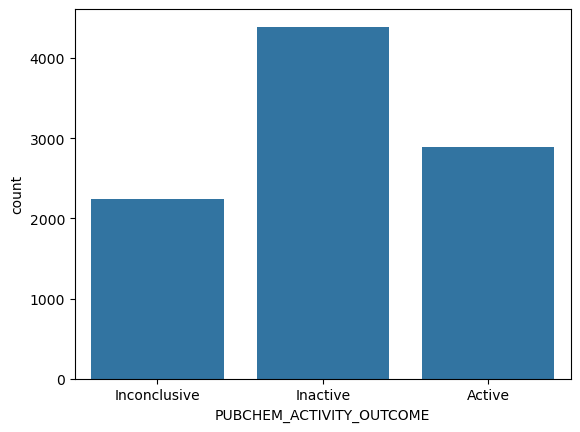

In [14]:
sns.countplot(data=tox, x="PUBCHEM_ACTIVITY_OUTCOME")

In [15]:
tox_actives = tox.query("PUBCHEM_ACTIVITY_OUTCOME == 'Active'")
tox_actives["active"] = True

/tmp/ipykernel_32412/1801113044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tox_actives["active"] = True


In [16]:
tox_actives.head()

,CANONICAL_SMILES,INCHIKEY,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_CID,dataset,data_type,common_name,action_type,active
8,CC(N)C(=O)c1ccccc1,PUAQLLVFLMYYJJ-UHFFFAOYSA-N,Active,11956149.0,tox_adme_aid1671199,assay,NaN,inhibitor,True
10,COc1cc(CCN)cc(OC)c1OC,RHCSKNNOAZULRK-UHFFFAOYSA-N,Active,71580.0,tox_adme_aid1671199,assay,NaN,inhibitor,True
11,COc1cc(CC(C)N)cc(OC)c1OC,WGTASENVNYJZBK-UHFFFAOYSA-N,Active,110689.0,tox_adme_aid1671199,assay,NaN,inhibitor,True
22,CCc1cc(OC)c(C[C@H](C)N)cc1OC,HXJKWPGVENNMCC-VIFPVBQESA-N,Active,60196319.0,tox_adme_aid1671199,assay,NaN,inhibitor,True
23,COc1cc(CC(C)N)cc2c1OCO2,YQYUWUKDEVZFDB-UHFFFAOYSA-N,Active,43398.0,tox_adme_aid1671199,assay,NaN,inhibitor,True


In [17]:
tox_actives = tox_actives[keep_cols_all]
tox_actives

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type
8,CC(N)C(=O)c1ccccc1,PUAQLLVFLMYYJJ-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor
10,COc1cc(CCN)cc(OC)c1OC,RHCSKNNOAZULRK-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor
11,COc1cc(CC(C)N)cc(OC)c1OC,WGTASENVNYJZBK-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor
22,CCc1cc(OC)c(C[C@H](C)N)cc1OC,HXJKWPGVENNMCC-VIFPVBQESA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor
23,COc1cc(CC(C)N)cc2c1OCO2,YQYUWUKDEVZFDB-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor
...,...,...,...,...,...,...,...
9506,C/C=C/c1ccc(OC)c(OC)c1,NNWHUJCUHAELCL-SNAWJCMRSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor
9511,SCc1ccco1,ZFFTZDQKIXPDAF-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor
9513,Cc1ccc2sc3cccc(C)c3c2c1,KMPJENUWHPZRGZ-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor
9514,Cc1c(Cl)c(=O)oc2cc(O)ccc12,ODZHLDRQCZXQFQ-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor


# Chembl

The chembl data is an aggregation for CYP1A2

Some postprocessing steps have been applied to select high quality actives from the range of assays available, defs not the only way to do this. 




* Select assays with IC50, AC50, pIC50, XC50, EC50, Ki or potency endpoints
* Select assays in nM
* Select assays with >=  N molecules (10)
* Select compounds with mean pChembl > 5 accross all assays
* Select compounds that appear in >= L of assays



In [18]:
chembl_actives = pd.read_csv("processed/chembl_active_selected.csv")
chembl_actives.head()

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active
0,O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12,VFMMPHCGEFXGIP-UHFFFAOYSA-N,7.594167,0.585390,ALPHA-NAPHTHOFLAVONE,12,NaN,ChEMBL_curated,True
1,CC(C)NC[C@@H](O)COc1cccc2ccccc12,AQHHHDLHHXJYJD-CQSZACIVSA-N,6.385714,0.414039,DEXPROPRANOLOL,7,NaN,ChEMBL_curated,True
2,Cc1nc2c(=O)n(C)c(=O)n(Cc3ccco3)c2[nH]1,KGQZGCIVHYLPBH-UHFFFAOYSA-N,5.324000,0.673817,FURAFYLLINE,5,NaN,ChEMBL_curated,True
3,COC(=O)C1=C(C)N=C(C)C(C(=O)OC)C1c1ccccc1[N+](=...,OSUCQKNXQBPLDG-UHFFFAOYSA-N,6.715000,0.817537,NIFEDIPINE,4,NaN,ChEMBL_curated,True
4,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,REFJWTPEDVJJIY-UHFFFAOYSA-N,5.925000,0.460326,QUERCETIN,4,NaN,ChEMBL_curated,True


# FDA approved

Compounds the FDA really reccomends you try

In [19]:
fda = pd.read_csv("./processed/fda.csv")

# Flockheart


In [20]:
flockheart = pd.read_csv("./processed/flockheart.csv")

# Combine everything


## NOTE

common name being blank is not that these compounds do not have a common name, but that they need to be pulled from pubchem

In [21]:
combined_literature = pd.concat([tox_actives, ncats_actives, veith_actives, fda, flockheart])
combined_literature

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,SMILES,FDA_recommended
8,CC(N)C(=O)c1ccccc1,PUAQLLVFLMYYJJ-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,NaN
10,COc1cc(CCN)cc(OC)c1OC,RHCSKNNOAZULRK-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,NaN
11,COc1cc(CC(C)N)cc(OC)c1OC,WGTASENVNYJZBK-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,NaN
22,CCc1cc(OC)c(C[C@H](C)N)cc1OC,HXJKWPGVENNMCC-VIFPVBQESA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,NaN
23,COc1cc(CC(C)N)cc2c1OCO2,YQYUWUKDEVZFDB-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,NaN
...,...,...,...,...,...,...,...,...,...
19,COc1ccc2c(OC3CC4C(=O)NC5(C(=O)NS(=O)(=O)C6CC6)...,JTZZSQYMACOLNN-CSKARUKUSA-N,True,flockheart,NaN,simeprevir,inhibitor,CC1=C(C=CC2=C1N=C(C=C2OC3CC4C(C3)C(=O)N(CCCC/C...,NaN
20,COc1ccc2c(O[C@@H]3CC4C(=O)N[C@]5(C(=O)NS(=O)(=...,JTZZSQYMACOLNN-URUITPCYSA-N,True,flockheart,NaN,simeprevir,inhibitor,CC1=C(C=CC2=C1N=C(C=C2O[C@@H]3C[C@@H]4[C@@H](C...,NaN
21,COc1ccc2c(O[C@@H]3CC4C(=O)N[C@@]5(C(=O)NS(=O)(...,JTZZSQYMACOLNN-GUWPEQAESA-N,True,flockheart,NaN,simeprevir,inhibitor,CC1=C(C=CC2=C1N=C(C=C2O[C@@H]3C[C@@H]4[C@@H](C...,NaN
22,CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(-c4cc...,GPXBXXGIAQBQNI-UHFFFAOYSA-N,True,flockheart,NaN,vemurafenib,inhibitor,CCCS(=O)(=O)NC1=C(C(=C(C=C1)F)C(=O)C2=CNC3=C2C...,NaN


In [22]:
combined_literature["FDA_recommended"] = combined_literature["FDA_recommended"].fillna(False)

In [23]:
combined_literature.INCHIKEY.duplicated().sum()  # close same result with SMILES

np.int64(3551)

In [24]:
combined_literature.dropna(subset="INCHIKEY", inplace=True)

In [25]:
combined_literature_chembl = pd.concat([combined_literature, chembl_actives])

In [26]:
combined_literature_chembl

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,SMILES,FDA_recommended,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays
8,CC(N)C(=O)c1ccccc1,PUAQLLVFLMYYJJ-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN
10,COc1cc(CCN)cc(OC)c1OC,RHCSKNNOAZULRK-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN
11,COc1cc(CC(C)N)cc(OC)c1OC,WGTASENVNYJZBK-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN
22,CCc1cc(OC)c(C[C@H](C)N)cc1OC,HXJKWPGVENNMCC-VIFPVBQESA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN
23,COc1cc(CC(C)N)cc2c1OCO2,YQYUWUKDEVZFDB-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6447,Cc1noc(NC(=O)Nc2ccccc2F)c1C#N,XKXNHDFGHFCRBG-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,6.1,NaN,1.0
6448,CS(=O)(=O)Nc1ccc(Nc2c3ccccc3nc3ccccc23)cc1,QDTNJAYLSJACEQ-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.4,NaN,1.0
6449,Oc1ccc2ccccc2c1/C=C\c1ccc2c(Br)cc(Br)c(O)c2n1,NGEIVDFIXGKIKP-VURMDHGXSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.4,NaN,1.0
6450,Cn1ncc2c(NCCc3ccccc3)nc(Cl)nc21,KRNAPVRIULRUAL-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.6,NaN,1.0


In [27]:
combined_literature_chembl.FDA_recommended.value_counts()

FDA_recommended
False    13181
 True        7
Name: count, dtype: int64

In [28]:
combined_literature_chembl.dataset.value_counts()

dataset
ChEMBL_curated         6452
veith_2009             5826
ncats_adme_aid410      4438
tox_adme_aid1671199    2893
flockheart               24
FDA                       7
Name: count, dtype: int64

In [29]:
combined_literature_chembl.INCHIKEY.duplicated().sum()

np.int64(8474)

In [30]:
combined_literature_chembl.INCHIKEY.isna().sum()

np.int64(0)

In [31]:
combined_literature_chembl

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,SMILES,FDA_recommended,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays
8,CC(N)C(=O)c1ccccc1,PUAQLLVFLMYYJJ-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN
10,COc1cc(CCN)cc(OC)c1OC,RHCSKNNOAZULRK-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN
11,COc1cc(CC(C)N)cc(OC)c1OC,WGTASENVNYJZBK-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN
22,CCc1cc(OC)c(C[C@H](C)N)cc1OC,HXJKWPGVENNMCC-VIFPVBQESA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN
23,COc1cc(CC(C)N)cc2c1OCO2,YQYUWUKDEVZFDB-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6447,Cc1noc(NC(=O)Nc2ccccc2F)c1C#N,XKXNHDFGHFCRBG-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,6.1,NaN,1.0
6448,CS(=O)(=O)Nc1ccc(Nc2c3ccccc3nc3ccccc23)cc1,QDTNJAYLSJACEQ-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.4,NaN,1.0
6449,Oc1ccc2ccccc2c1/C=C\c1ccc2c(Br)cc(Br)c(O)c2n1,NGEIVDFIXGKIKP-VURMDHGXSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.4,NaN,1.0
6450,Cn1ncc2c(NCCc3ccccc3)nc(Cl)nc21,KRNAPVRIULRUAL-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.6,NaN,1.0


In [32]:
appears = combined_literature_chembl.groupby("INCHIKEY")["dataset"].nunique().reset_index(name="appears_in_N_datasets")
appears.set_index("INCHIKEY")

,appears_in_N_datasets
INCHIKEY,
AABYLPRACHMDSN-BIWBPYCESA-N,1
AABYLPRACHMDSN-REETXPBOSA-N,1
AACUVVMEFJMWSX-UHFFFAOYSA-N,1
AADCDMQTJNYOSS-LBPRGKRZSA-N,4
AADVZSXPNRLYLV-XJGFJUGXSA-N,1
...,...
ZZWKZQDOSJAGGF-WLNFFEQUSA-N,1
ZZYASVWWDLJXIM-UHFFFAOYSA-N,1
ZZYJHNUULCMTJL-UHFFFAOYSA-N,1


In [33]:
appears.isna().sum()

INCHIKEY                 0
appears_in_N_datasets    0
dtype: int64

<Axes: xlabel='appears_in_N_datasets', ylabel='count'>

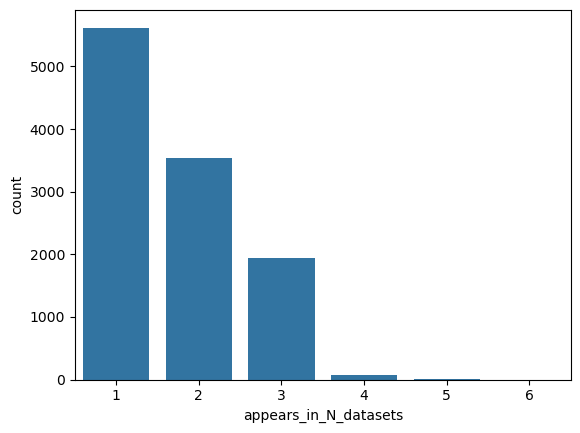

In [34]:
sns.countplot(data=appears, x="appears_in_N_datasets")

In [35]:
combined_literature_chembl_w_counts = combined_literature_chembl.merge(appears, on="INCHIKEY")
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,SMILES,FDA_recommended,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays,appears_in_N_datasets
0,CC(N)C(=O)c1ccccc1,PUAQLLVFLMYYJJ-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1
1,COc1cc(CCN)cc(OC)c1OC,RHCSKNNOAZULRK-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1
2,COc1cc(CC(C)N)cc(OC)c1OC,WGTASENVNYJZBK-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1
3,CCc1cc(OC)c(C[C@H](C)N)cc1OC,HXJKWPGVENNMCC-VIFPVBQESA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1
4,COc1cc(CC(C)N)cc2c1OCO2,YQYUWUKDEVZFDB-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19635,Cc1noc(NC(=O)Nc2ccccc2F)c1C#N,XKXNHDFGHFCRBG-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,6.1,NaN,1.0,2
19636,CS(=O)(=O)Nc1ccc(Nc2c3ccccc3nc3ccccc23)cc1,QDTNJAYLSJACEQ-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.4,NaN,1.0,3
19637,Oc1ccc2ccccc2c1/C=C\c1ccc2c(Br)cc(Br)c(O)c2n1,NGEIVDFIXGKIKP-VURMDHGXSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.4,NaN,1.0,2
19638,Cn1ncc2c(NCCc3ccccc3)nc(Cl)nc21,KRNAPVRIULRUAL-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.6,NaN,1.0,3


In [36]:
df_dummies = pd.get_dummies(combined_literature_chembl_w_counts['dataset'], prefix='dataset').join(combined_literature_chembl_w_counts["INCHIKEY"])
df_dummies

,dataset_ChEMBL_curated,dataset_FDA,dataset_flockheart,dataset_ncats_adme_aid410,dataset_tox_adme_aid1671199,dataset_veith_2009,INCHIKEY
0,False,False,False,False,True,False,PUAQLLVFLMYYJJ-UHFFFAOYSA-N
1,False,False,False,False,True,False,RHCSKNNOAZULRK-UHFFFAOYSA-N
2,False,False,False,False,True,False,WGTASENVNYJZBK-UHFFFAOYSA-N
3,False,False,False,False,True,False,HXJKWPGVENNMCC-VIFPVBQESA-N
4,False,False,False,False,True,False,YQYUWUKDEVZFDB-UHFFFAOYSA-N
...,...,...,...,...,...,...,...
19635,True,False,False,False,False,False,XKXNHDFGHFCRBG-UHFFFAOYSA-N
19636,True,False,False,False,False,False,QDTNJAYLSJACEQ-UHFFFAOYSA-N
19637,True,False,False,False,False,False,NGEIVDFIXGKIKP-VURMDHGXSA-N
19638,True,False,False,False,False,False,KRNAPVRIULRUAL-UHFFFAOYSA-N


In [37]:
df_result = df_dummies.groupby('INCHIKEY').max().reset_index()
df_result = df_result.set_index("INCHIKEY")

In [38]:
combined_literature_chembl_w_counts = combined_literature_chembl_w_counts.merge(df_result, on="INCHIKEY")
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,SMILES,FDA_recommended,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays,appears_in_N_datasets,dataset_ChEMBL_curated,dataset_FDA,dataset_flockheart,dataset_ncats_adme_aid410,dataset_tox_adme_aid1671199,dataset_veith_2009
0,CC(N)C(=O)c1ccccc1,PUAQLLVFLMYYJJ-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1,False,False,False,False,True,False
1,COc1cc(CCN)cc(OC)c1OC,RHCSKNNOAZULRK-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1,False,False,False,False,True,False
2,COc1cc(CC(C)N)cc(OC)c1OC,WGTASENVNYJZBK-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1,False,False,False,False,True,False
3,CCc1cc(OC)c(C[C@H](C)N)cc1OC,HXJKWPGVENNMCC-VIFPVBQESA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1,False,False,False,False,True,False
4,COc1cc(CC(C)N)cc2c1OCO2,YQYUWUKDEVZFDB-UHFFFAOYSA-N,True,tox_adme_aid1671199,assay,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19635,Cc1noc(NC(=O)Nc2ccccc2F)c1C#N,XKXNHDFGHFCRBG-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,6.1,NaN,1.0,2,True,False,False,True,False,False
19636,CS(=O)(=O)Nc1ccc(Nc2c3ccccc3nc3ccccc23)cc1,QDTNJAYLSJACEQ-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.4,NaN,1.0,3,True,False,False,True,False,True
19637,Oc1ccc2ccccc2c1/C=C\c1ccc2c(Br)cc(Br)c(O)c2n1,NGEIVDFIXGKIKP-VURMDHGXSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.4,NaN,1.0,2,True,False,False,False,False,True
19638,Cn1ncc2c(NCCc3ccccc3)nc(Cl)nc21,KRNAPVRIULRUAL-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.6,NaN,1.0,3,True,False,False,True,False,True


In [39]:
combined_literature_chembl_w_counts.action_type.value_counts()

action_type
inhibitor     13295
 substrate        4
 inhibitor        3
Name: count, dtype: int64

In [40]:
combined_literature_chembl_w_counts.INCHIKEY.nunique()

11166

In [41]:
combined_literature_chembl_w_counts['common_name'].isna().sum()

np.int64(19307)

In [42]:
# we can just sort by appears_in_N_ChEMBL_assays to get all the chembl data at the top, then uniquify on INCHIKEY

combined_literature_chembl_w_counts.sort_values(["appears_in_N_ChEMBL_assays", "appears_in_N_datasets"], ascending=[False,False],  inplace=True)

In [43]:
# fill common name from gropupby 
combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

/tmp/ipykernel_32412/1096375121.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
/tmp/ipykernel_32412/1096375121.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [44]:
combined_literature_chembl_w_counts['common_name'].isna().sum()

np.int64(18586)

In [45]:
combined_literature_chembl_w_counts.drop(columns=["dataset","data_type"], inplace=True)

In [46]:
combined_literature_chembl_w_counts.head()

,CANONICAL_SMILES,INCHIKEY,active,common_name,action_type,SMILES,FDA_recommended,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays,appears_in_N_datasets,dataset_ChEMBL_curated,dataset_FDA,dataset_flockheart,dataset_ncats_adme_aid410,dataset_tox_adme_aid1671199,dataset_veith_2009
13188,O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12,VFMMPHCGEFXGIP-UHFFFAOYSA-N,True,ALPHA-NAPHTHOFLAVONE,NaN,NaN,NaN,7.594167,0.585390,12.0,2,True,False,False,True,False,False
13189,CC(C)NC[C@@H](O)COc1cccc2ccccc12,AQHHHDLHHXJYJD-CQSZACIVSA-N,True,DEXPROPRANOLOL,NaN,NaN,NaN,6.385714,0.414039,7.0,3,True,False,False,True,True,False
13190,Cc1nc2c(=O)n(C)c(=O)n(Cc3ccco3)c2[nH]1,KGQZGCIVHYLPBH-UHFFFAOYSA-N,True,FURAFYLLINE,NaN,NaN,NaN,5.324000,0.673817,5.0,6,True,True,True,True,True,True
13192,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,REFJWTPEDVJJIY-UHFFFAOYSA-N,True,QUERCETIN,NaN,NaN,NaN,5.925000,0.460326,4.0,5,True,False,True,True,True,True
13194,CN(C)CCCN1c2ccccc2Sc2ccc(Cl)cc21,ZPEIMTDSQAKGNT-UHFFFAOYSA-N,True,CHLORPROMAZINE HYDROCHLORIDE,NaN,NaN,NaN,5.482500,0.363169,4.0,4,True,False,False,True,True,True


In [47]:
fda_reccomends_mask = combined_literature_chembl_w_counts.INCHIKEY.isin(fda.INCHIKEY)

fda_reccomends_mask

13188    False
13189    False
13190     True
13192    False
13194    False
         ...  
13182    False
13183    False
13184    False
13185    False
13186    False
Name: INCHIKEY, Length: 19640, dtype: bool

In [48]:
combined_literature_chembl_w_counts["FDA_recommended"][fda_reccomends_mask] = True

/tmp/ipykernel_32412/383759248.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  combined_literature_chembl_w_counts["FDA_recommended"][fda_reccomends_mask] = True
/tmp/ipykernel_32412/383759248.py:1: SettingWithCopyWarning: 
A value is tr

In [49]:
combined_literature_chembl_w_counts.drop_duplicates(subset="INCHIKEY", inplace=True)

In [50]:
combined_literature_chembl_w_counts["action_type"] = combined_literature_chembl_w_counts["action_type"].fillna("unknown")

In [51]:
combined_literature_chembl_w_counts["inclusion_score"] = combined_literature_chembl_w_counts["appears_in_N_ChEMBL_assays"].fillna(0) + combined_literature_chembl_w_counts["appears_in_N_datasets"].fillna(0)

In [52]:
combined_literature_chembl_w_counts.sort_values("inclusion_score", ascending=False, inplace=True)

In [53]:
combined_literature_chembl_w_counts.to_csv("final/actives_final.csv", index=False)

In [54]:
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,active,common_name,action_type,SMILES,FDA_recommended,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays,appears_in_N_datasets,dataset_ChEMBL_curated,dataset_FDA,dataset_flockheart,dataset_ncats_adme_aid410,dataset_tox_adme_aid1671199,dataset_veith_2009,inclusion_score
13188,O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12,VFMMPHCGEFXGIP-UHFFFAOYSA-N,True,ALPHA-NAPHTHOFLAVONE,unknown,NaN,NaN,7.594167,0.585390,12.0,2,True,False,False,True,False,False,14.0
13190,Cc1nc2c(=O)n(C)c(=O)n(Cc3ccco3)c2[nH]1,KGQZGCIVHYLPBH-UHFFFAOYSA-N,True,FURAFYLLINE,unknown,NaN,True,5.324000,0.673817,5.0,6,True,True,True,True,True,True,11.0
13189,CC(C)NC[C@@H](O)COc1cccc2ccccc12,AQHHHDLHHXJYJD-CQSZACIVSA-N,True,DEXPROPRANOLOL,unknown,NaN,NaN,6.385714,0.414039,7.0,3,True,False,False,True,True,False,10.0
13192,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,REFJWTPEDVJJIY-UHFFFAOYSA-N,True,QUERCETIN,unknown,NaN,NaN,5.925000,0.460326,4.0,5,True,False,True,True,True,True,9.0
13194,CN(C)CCCN1c2ccccc2Sc2ccc(Cl)cc21,ZPEIMTDSQAKGNT-UHFFFAOYSA-N,True,CHLORPROMAZINE HYDROCHLORIDE,unknown,NaN,NaN,5.482500,0.363169,4.0,4,True,False,False,True,True,True,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,CC(Cc1ccc(C(C)(C)C)cc1)CN1C[C@@H](C)O[C@@H](C)C1,RYAUSSKQMZRMAI-ALOPSCKCSA-N,True,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1,False,False,False,False,True,False,1.0
1615,CCC1COC(Cn2cncn2)(c2ccc(Cl)cc2Cl)O1,DWRKFAJEBUWTQM-UHFFFAOYSA-N,True,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1,False,False,False,False,True,False,1.0
1614,O=C1c2ccccc2C(=O)C1C(=O)C(c1ccccc1)c1ccc(Cl)cc1,UDHXJZHVNHGCEC-UHFFFAOYSA-N,True,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1,False,False,False,False,True,False,1.0
1613,CCOC(=O)C(SP(=S)(OC)OC)c1ccccc1,XAMUDJHXFNRLCY-UHFFFAOYSA-N,True,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1,False,False,False,False,True,False,1.0
